In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('labelled-balanced-data11.csv')

In [12]:
df.head()

,Region,Age,Gender,BMI,Waist_Size,Physical_Activity,Diet,BP,Family_History,Smoking,Class
0,10,2,1,1,2,1,1,0,1,1,0
1,8,1,1,1,2,0,1,1,0,1,0
2,8,3,0,0,1,0,0,1,1,1,1
3,2,0,1,2,2,0,1,1,2,1,0
4,7,0,0,1,2,0,1,0,2,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Region             7806 non-null   int64
 1   Age                7806 non-null   int64
 2   Gender             7806 non-null   int64
 3   BMI                7806 non-null   int64
 4   Waist_Size         7806 non-null   int64
 5   Physical_Activity  7806 non-null   int64
 6   Diet               7806 non-null   int64
 7   BP                 7806 non-null   int64
 8   Family_History     7806 non-null   int64
 9   Smoking            7806 non-null   int64
 10  Class              7806 non-null   int64
dtypes: int64(11)
memory usage: 671.0 KB


In [14]:
df['Class'].value_counts()

Class
0    3906
1    3900
Name: count, dtype: int64

In [16]:
x_rfe_NZOA = df[['Age', 'Smoking']]
x_rfe_ZOA = df[['BP', 'Age']]
x_rf_NZOA = df[['BMI', 'Physical_Activity']]
x_rf_ZOA = df[['Age', 'BMI','Family_History']]
y=df['Class']

In [17]:
from sklearn.model_selection import train_test_split

# Assuming you have already defined x_rfe_NZOA, x_rfe_ZOA, x_rf_NZOA, x_rf_ZOA, and y as mentioned in your question

# Splitting the data into training and testing sets for each subset
x_rfe_NZOA_train, x_rfe_NZOA_test, y_train, y_test = train_test_split(x_rfe_NZOA, y, test_size=0.3, random_state=42)
x_rfe_ZOA_train, x_rfe_ZOA_test, y_train, y_test = train_test_split(x_rfe_ZOA, y, test_size=0.3, random_state=42)
x_rf_NZOA_train, x_rf_NZOA_test, y_train, y_test = train_test_split(x_rf_NZOA, y, test_size=0.3, random_state=42)
x_rf_ZOA_train, x_rf_ZOA_test, y_train, y_test = train_test_split(x_rf_ZOA, y, test_size=0.3, random_state=42)

# Note: You may want to adjust the test_size and random_state parameters based on your specific requirements.


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split the data into training and testing sets as mentioned before

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the models
rf_classifier.fit(x_rfe_NZOA_train, y_train)
y_pred_rfe_NZOA = rf_classifier.predict(x_rfe_NZOA_test)

rf_classifier.fit(x_rfe_ZOA_train, y_train)
y_pred_rfe_ZOA = rf_classifier.predict(x_rfe_ZOA_test)

rf_classifier.fit(x_rf_NZOA_train, y_train)
y_pred_rf_NZOA = rf_classifier.predict(x_rf_NZOA_test)

rf_classifier.fit(x_rf_ZOA_train, y_train)
y_pred_rf_ZOA = rf_classifier.predict(x_rf_ZOA_test)

# Evaluate the performance of each model
accuracy_rfe_NZOA = accuracy_score(y_test, y_pred_rfe_NZOA)
accuracy_rfe_ZOA = accuracy_score(y_test, y_pred_rfe_ZOA)
accuracy_rf_NZOA = accuracy_score(y_test, y_pred_rf_NZOA)
accuracy_rf_ZOA = accuracy_score(y_test, y_pred_rf_ZOA)

# Print the accuracy for each model
print(f'Accuracy for x_rfe_NZOA: {accuracy_rfe_NZOA:.2f}')
print(f'Accuracy for x_rfe_ZOA: {accuracy_rfe_ZOA:.2f}')
print(f'Accuracy for x_rf_NZOA: {accuracy_rf_NZOA:.2f}')
print(f'Accuracy for x_rf_ZOA: {accuracy_rf_ZOA:.2f}')


Accuracy for x_rfe_NZOA: 0.80
Accuracy for x_rfe_ZOA: 0.56
Accuracy for x_rf_NZOA: 0.58
Accuracy for x_rf_ZOA: 0.52


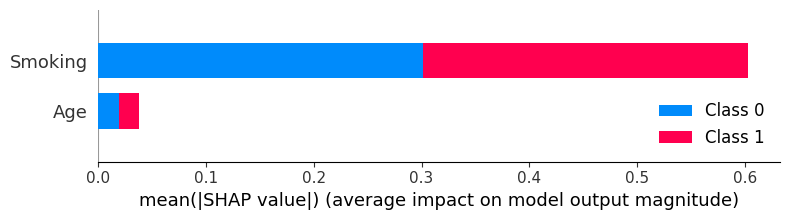

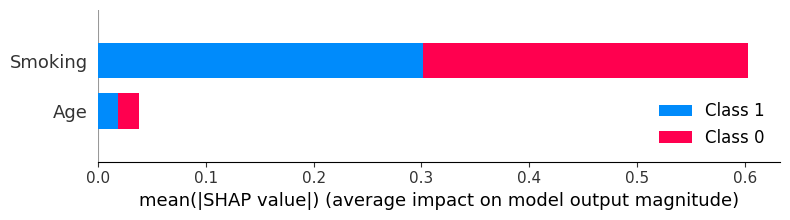

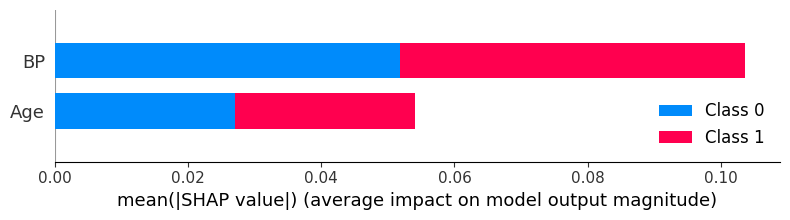

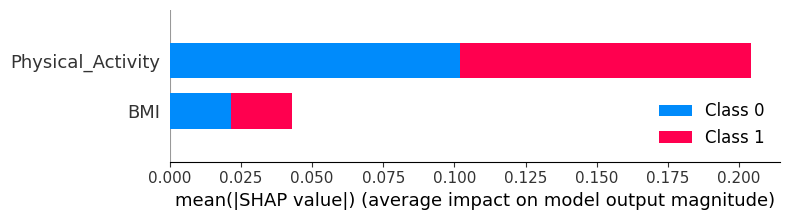

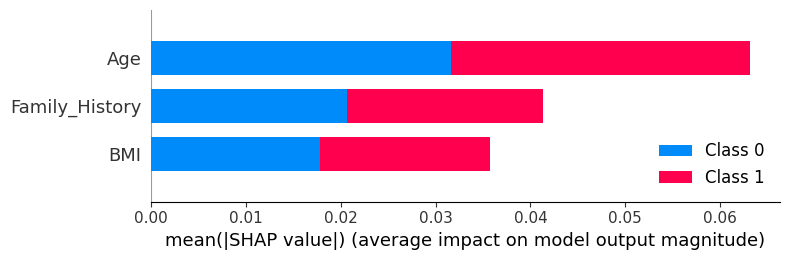

In [36]:
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt


import shap
# Initialize the explainer
explainer = shap.TreeExplainer(rf_classifier)


# Assuming you have already split the data into training and testing sets as mentioned before

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()




# Assuming you have already split the data into training and testing sets as mentioned before

# Train the model
rf_classifier.fit(x_rfe_NZOA_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the entire x_test dataset
shap_values = explainer.shap_values(x_rfe_NZOA_test)

# Visualize the SHAP values using a summary plot
shap.summary_plot(shap_values, x_rfe_NZOA_test, feature_names=x_rfe_NZOA_test.columns)



# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the models
rf_classifier.fit(x_rfe_ZOA_train, y_train)
explainer_rfe_ZOA = shap.TreeExplainer(rf_classifier)
shap_values_rfe_ZOA = explainer_rfe_ZOA.shap_values(x_rfe_ZOA_test)

shap.summary_plot(shap_values_rfe_ZOA, x_rfe_ZOA_test, feature_names=x_rfe_ZOA_test.columns)
# plt.title("SHAP Values for x_rfe_ZOA")
# plt.show()

rf_classifier.fit(x_rf_NZOA_train, y_train)
explainer_rf_NZOA = shap.TreeExplainer(rf_classifier)
shap_values_rf_NZOA = explainer_rf_NZOA.shap_values(x_rf_NZOA_test)

shap.summary_plot(shap_values_rf_NZOA, x_rf_NZOA_test, feature_names=x_rf_NZOA_test.columns)
# plt.title("SHAP Values for x_rf_NZOA")
# plt.show()


rf_classifier.fit(x_rf_ZOA_train, y_train)
explainer_rf_ZOA = shap.TreeExplainer(rf_classifier)
shap_values_rf_ZOA = explainer_rf_ZOA.shap_values(x_rf_ZOA_test)

shap.summary_plot(shap_values_rf_ZOA, x_rf_ZOA_test, feature_names=x_rf_ZOA_test.columns)
# plt.title("SHAP Values for x_rf_ZOA")
# plt.show()







In [51]:
x=rf_classifier.fit(x_rfe_NZOA_train, y_train)
explainer1 = shap.Explainer(x,x_rf_NZOA_train)
shap_values = explainer(x_rf_NZOA_train)